# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [13]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Simulations

In [14]:
nsample = 10000

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample)

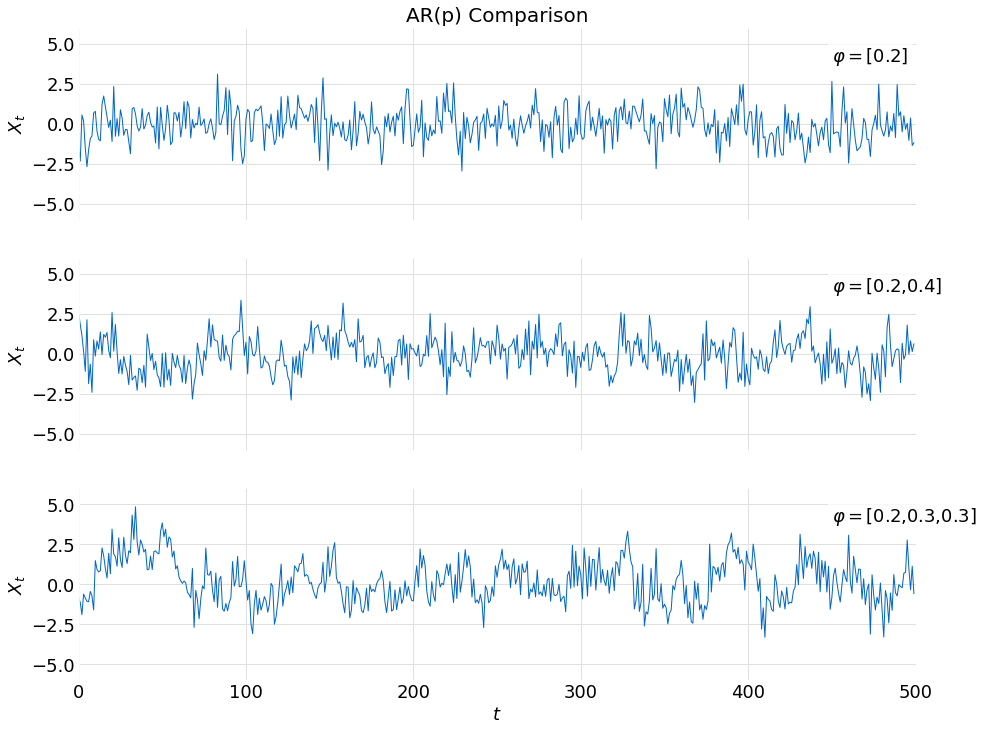

In [15]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = numpy.array([ar1[:500], ar2[:500], ar3[:500]])
plots.time_series_stack(samples, labels, [-6.0, 6.0], title)

## Estimation of $\text{ARMA}(p)$ Parameters

$\text{ARMA}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1)

The parameter used in the $\text{AR}(p)$ simulation is $\varphi = 0.2$

In [16]:
arima.yw_acf(ar1, 1)

array([0.19793837])

In [17]:
result = arima.arma_estimate(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.        , -0.19798759]),
 array([0.01245711, 0.00985555, 0.01391093]))

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14172.080
Date:                Sun, 13 Mar 2022   AIC                          28350.161
Time:                        12:48:54   BIC                          28371.792
Sample:                             0   HQIC                         28357.483
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.012     -0.042      0.967      -0.025       0.024
ar.L1          0.1980      0.010     20.089      0.000       0.179       0.217
sigma2         0.9966      0.014     71.644      0.000       0.969       1.024
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.85   Prob(JB):                         0.52
Heteroskedasticity (H):               0.98   Skew:                            -0.01
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2)
The parameters used in the $\text{AR}(p)$ simulation is $\varphi = [0.2, 0.4]$

In [19]:
arima.yw_acf(ar2, 2)

array([0.19664631, 0.38587684])

In [20]:
result = arima.arma_estimate(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.19677043, -0.38618771]),
 array([0.02410678, 0.00911526, 0.00932569, 0.01429259]))

In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -14250.764
Date:                Sun, 13 Mar 2022   AIC                          28509.528
Time:                        12:48:55   BIC                          28538.369
Sample:                             0   HQIC                         28519.290
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.024      0.163      0.871      -0.043       0.051
ar.L1          0.1968      0.009     21.587      0.000       0.179       0.215
ar.L2          0.3862      0.009     41.411      0.000       0.368       0.404
sigma2         1.0123      0.014     70.826      0.000       0.984       1.040
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.90   Prob(JB):                         0.95
Heteroskedasticity (H):               0.97   Skew:                            -0.01
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3)
The parameters used in the $\text{AR}(p)$ simulation is $\varphi = [0.2, 0.3, 0.3]$

In [22]:
arima.yw_acf(ar3, 3)

array([0.21253126, 0.30022854, 0.28717816])

In [23]:
result = arima.arma_estimate(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.21236513, -0.30019436, -0.28729921]),
 array([0.04975955, 0.00965433, 0.00930504, 0.00949834, 0.01403125]))

In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14149.524
Date:                Sun, 13 Mar 2022   AIC                          28309.047
Time:                        12:48:56   BIC                          28345.099
Sample:                             0   HQIC                         28321.250
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0416      0.050     -0.836      0.403      -0.139       0.056
ar.L1          0.2124      0.010     21.997      0.000       0.193       0.231
ar.L2          0.3002      0.009     32.261      0.000       0.282       0.318
ar.L3          0.2873      0.009     30.247      0.000       0.269       0.306
sigma2         0.9919      0.014     70.695      0.000       0.964       1.019
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.97   Prob(JB):                         0.99
Heteroskedasticity (H):               0.95   Skew:                             0.00
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""